# SHAP minimal example
Plot customized SHAP feature importances and summary-plot.

In [17]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
from xgboost import XGBRegressor

module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from plotting import create_shap_plot

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load sample data: Boston Housing

In [18]:
from sklearn.datasets import load_boston

boston = load_boston()

ffrmt = "feature_{:02d}".format

X = pd.DataFrame(boston.data)
X = X.rename(columns={i: ffrmt(i + 1) for i in range(X.shape[0])})

n_cols = X.shape[1]
cols = X.columns.tolist()
y = pd.Series(boston.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit dummy model

In [19]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# SHAP Plots

In [20]:
MAX_SHAP_SAMPLE = 5000

n_shap = min([MAX_SHAP_SAMPLE, X_train.shape[0]])
df_features = X_train.sample(n_shap)

shap_idx = df_features.index
shap_vals = shap.TreeExplainer(model).shap_values(df_features)
df_shap = pd.DataFrame(shap_vals, columns=X_train.columns)

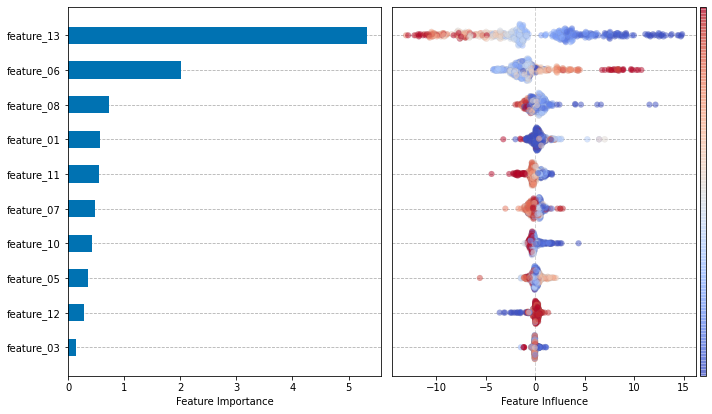

In [21]:
create_shap_plot(df_shap, df_features)

# Example without feature data

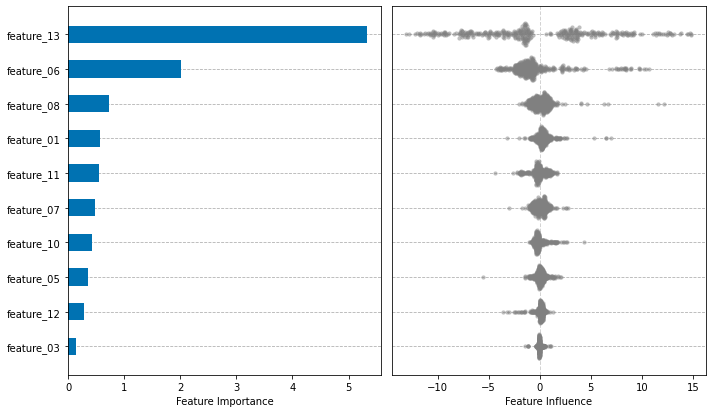

In [22]:
create_shap_plot(df_shap)